> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização.

In [3]:
# 1️⃣ Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-v0_8-darkgrid')  # estilo válido do Matplotlib

# 2️⃣ Seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")  # estilos: "whitegrid", "ticks", "white", "dark"

# 3️⃣ Plotly
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"  # templates: "plotly", "plotly_white", "ggplot2"


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [4]:
#### Solução com matplotlib

In [5]:
#### solução com seaborn

In [6]:
#### solução com plotly

In [11]:
import pandas as pd

# Copa masculina
url = "https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv"
wc = pd.read_csv(url)

# Filtra apenas jogos com público > 0
df_publico = wc[wc["Attendance"] > 0]  # na base original, a coluna de público se chama "Attendance"


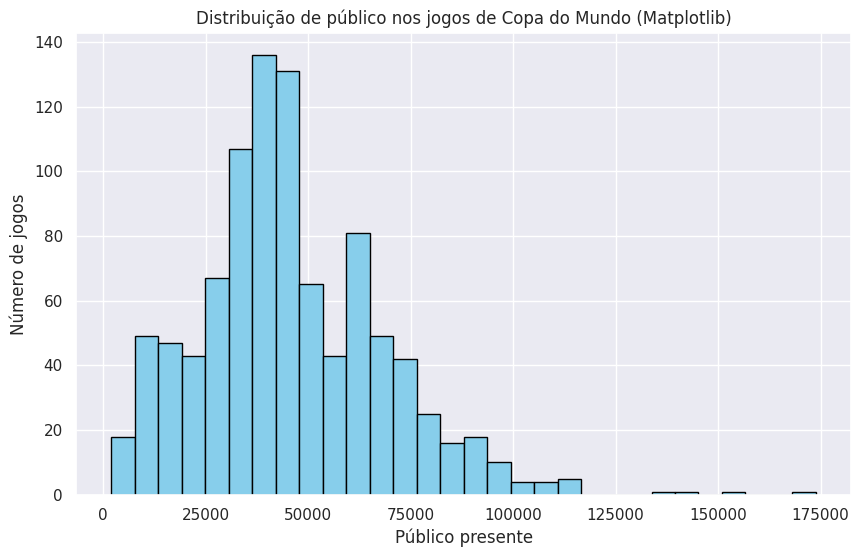

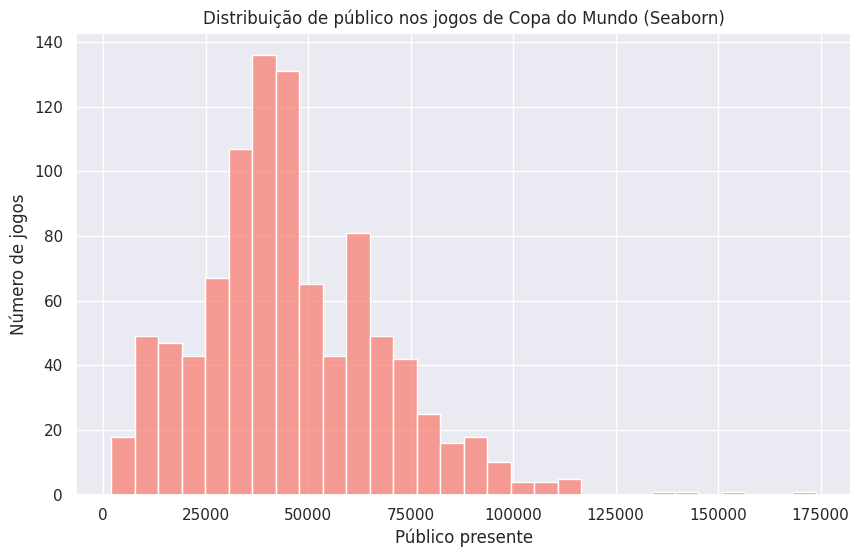

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
%matplotlib inline

# -----------------------------
# 1️⃣ Matplotlib
# -----------------------------
plt.figure(figsize=(10,6))
plt.hist(df_publico["Attendance"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribuição de público nos jogos de Copa do Mundo (Matplotlib)")
plt.xlabel("Público presente")
plt.ylabel("Número de jogos")
plt.grid(True)
plt.show()

# -----------------------------
# 2️⃣ Seaborn
# -----------------------------
plt.figure(figsize=(10,6))
sns.histplot(df_publico["Attendance"], bins=30, color='salmon', kde=False)
plt.title("Distribuição de público nos jogos de Copa do Mundo (Seaborn)")
plt.xlabel("Público presente")
plt.ylabel("Número de jogos")
plt.show()

# -----------------------------
# 3️⃣ Plotly
# -----------------------------
pio.templates.default = "plotly_dark"

fig = px.histogram(
    df_publico,
    x="Attendance",
    nbins=30,
    title="Distribuição de público nos jogos de Copa do Mundo (Plotly)",
    labels={"Attendance": "Público presente"}
)
fig.update_layout(
    yaxis_title="Número de jogos",
    xaxis_title="Público presente"
)
fig.show()


#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

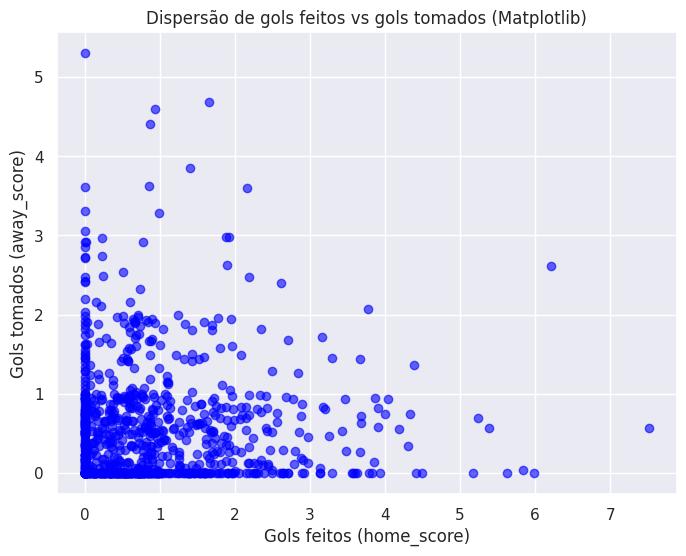

In [19]:
#### solução com matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Aplica uma leve distorção para visualização
gols = wc[['home_score','away_score']] * np.random.random((len(wc),2))

# Gráfico Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(gols['home_score'], gols['away_score'], alpha=0.6, color='blue')
plt.title("Dispersão de gols feitos vs gols tomados (Matplotlib)")
plt.xlabel("Gols feitos (home_score)")
plt.ylabel("Gols tomados (away_score)")
plt.grid(True)
plt.show()



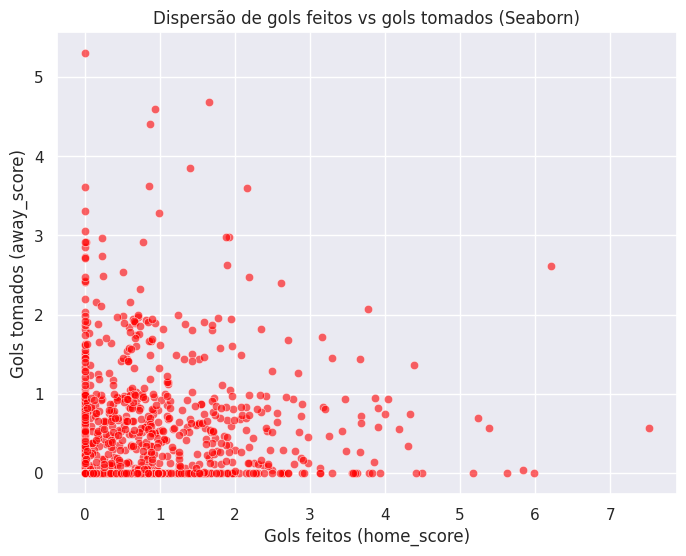

In [20]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Mantemos a distorção já criada anteriormente
# gols = wc[['home_score','away_score']] * np.random.random((len(wc),2))

plt.figure(figsize=(8,6))
sns.scatterplot(x=gols['home_score'], y=gols['away_score'], alpha=0.6, color='red')
plt.title("Dispersão de gols feitos vs gols tomados (Seaborn)")
plt.xlabel("Gols feitos (home_score)")
plt.ylabel("Gols tomados (away_score)")
plt.show()


In [21]:
#### solução com plotly
import plotly.express as px
import plotly.io as pio

# Define template escuro
pio.templates.default = "plotly_dark"

# Gráfico interativo
fig = px.scatter(
    gols,
    x='home_score',
    y='away_score',
    title="Dispersão de gols feitos vs gols tomados (Plotly)",
    labels={'home_score': 'Gols feitos (home_score)', 'away_score': 'Gols tomados (away_score)'},
    opacity=0.6
)

fig.show()


#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [22]:
import pandas as pd

# Supondo que você tenha carregado os CSVs masculino e feminino
# Aqui vou criar um exemplo para gerar os dados de participação:

# Exemplo de dados (você pode substituir pelo seu dataframe real)
data = {
    'país': ['Brazil','Germany','Argentina','USA','Japan','England','France','Mexico','Sweden','Italy'],
    'copa': ['Masculina','Masculina','Masculina','Feminina','Feminina','Masculina','Feminina','Masculina','Feminina','Masculina'],
    'num_copas': [21,21,20,8,7,20,8,20,8,18]
}

participacao = pd.DataFrame(data)

# Pivot para formato adequado para barras empilhadas
participacao_pivot = participacao.pivot(index='país', columns='copa', values='num_copas').fillna(0)

# Seleciona top 10 por total de participações
participacao_pivot['total'] = participacao_pivot.sum(axis=1)
top10 = participacao_pivot.sort_values('total', ascending=False).head(10)


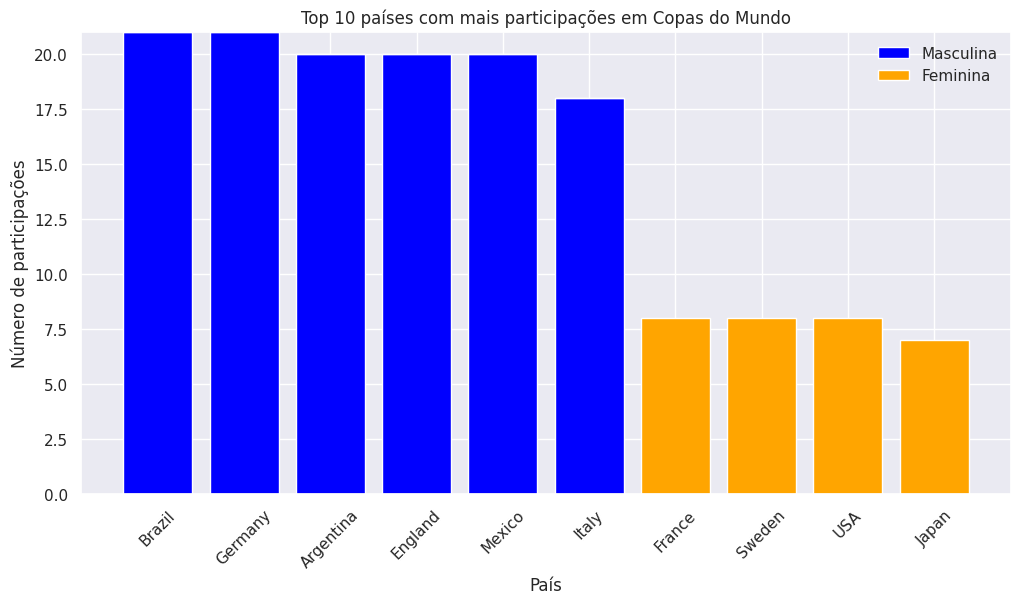

In [23]:
#### solução com matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Configura dados
x = top10.index
masc = top10['Masculina'] if 'Masculina' in top10 else [0]*len(top10)
fem = top10['Feminina'] if 'Feminina' in top10 else [0]*len(top10)

plt.figure(figsize=(12,6))
plt.bar(x, masc, label='Masculina', color='blue')
plt.bar(x, fem, bottom=masc, label='Feminina', color='orange')

plt.title("Top 10 países com mais participações em Copas do Mundo")
plt.xlabel("País")
plt.ylabel("Número de participações")
plt.legend()
plt.xticks(rotation=45)
plt.show()


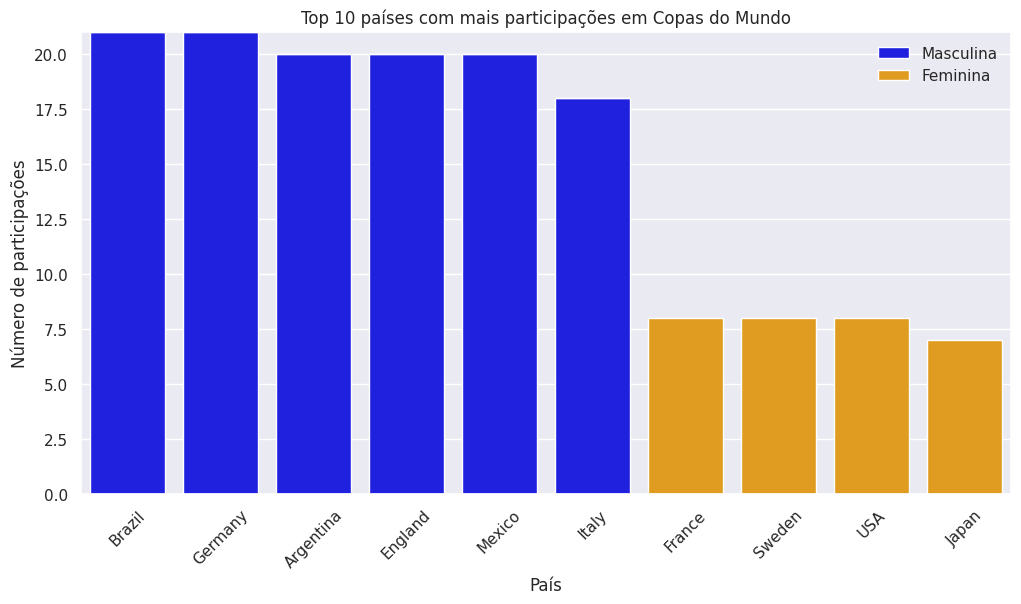

In [24]:
#### solução com seaborn
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=x, y=masc, color='blue', label='Masculina')
sns.barplot(x=x, y=fem, bottom=masc, color='orange', label='Feminina')

plt.title("Top 10 países com mais participações em Copas do Mundo")
plt.xlabel("País")
plt.ylabel("Número de participações")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [25]:
#### solução com plotly
import plotly.express as px

# Convertemos para formato longo para Plotly
top10_long = top10.reset_index().melt(id_vars='país', value_vars=['Masculina','Feminina'],
                                      var_name='copa', value_name='num_copas')

fig = px.bar(top10_long, x='país', y='num_copas', color='copa', title="Top 10 países com mais participações em Copas do Mundo",
             labels={'país':'País', 'num_copas':'Número de participações', 'copa':'Tipo de Copa'})

fig.show()


#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

In [29]:
wc.columns


Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

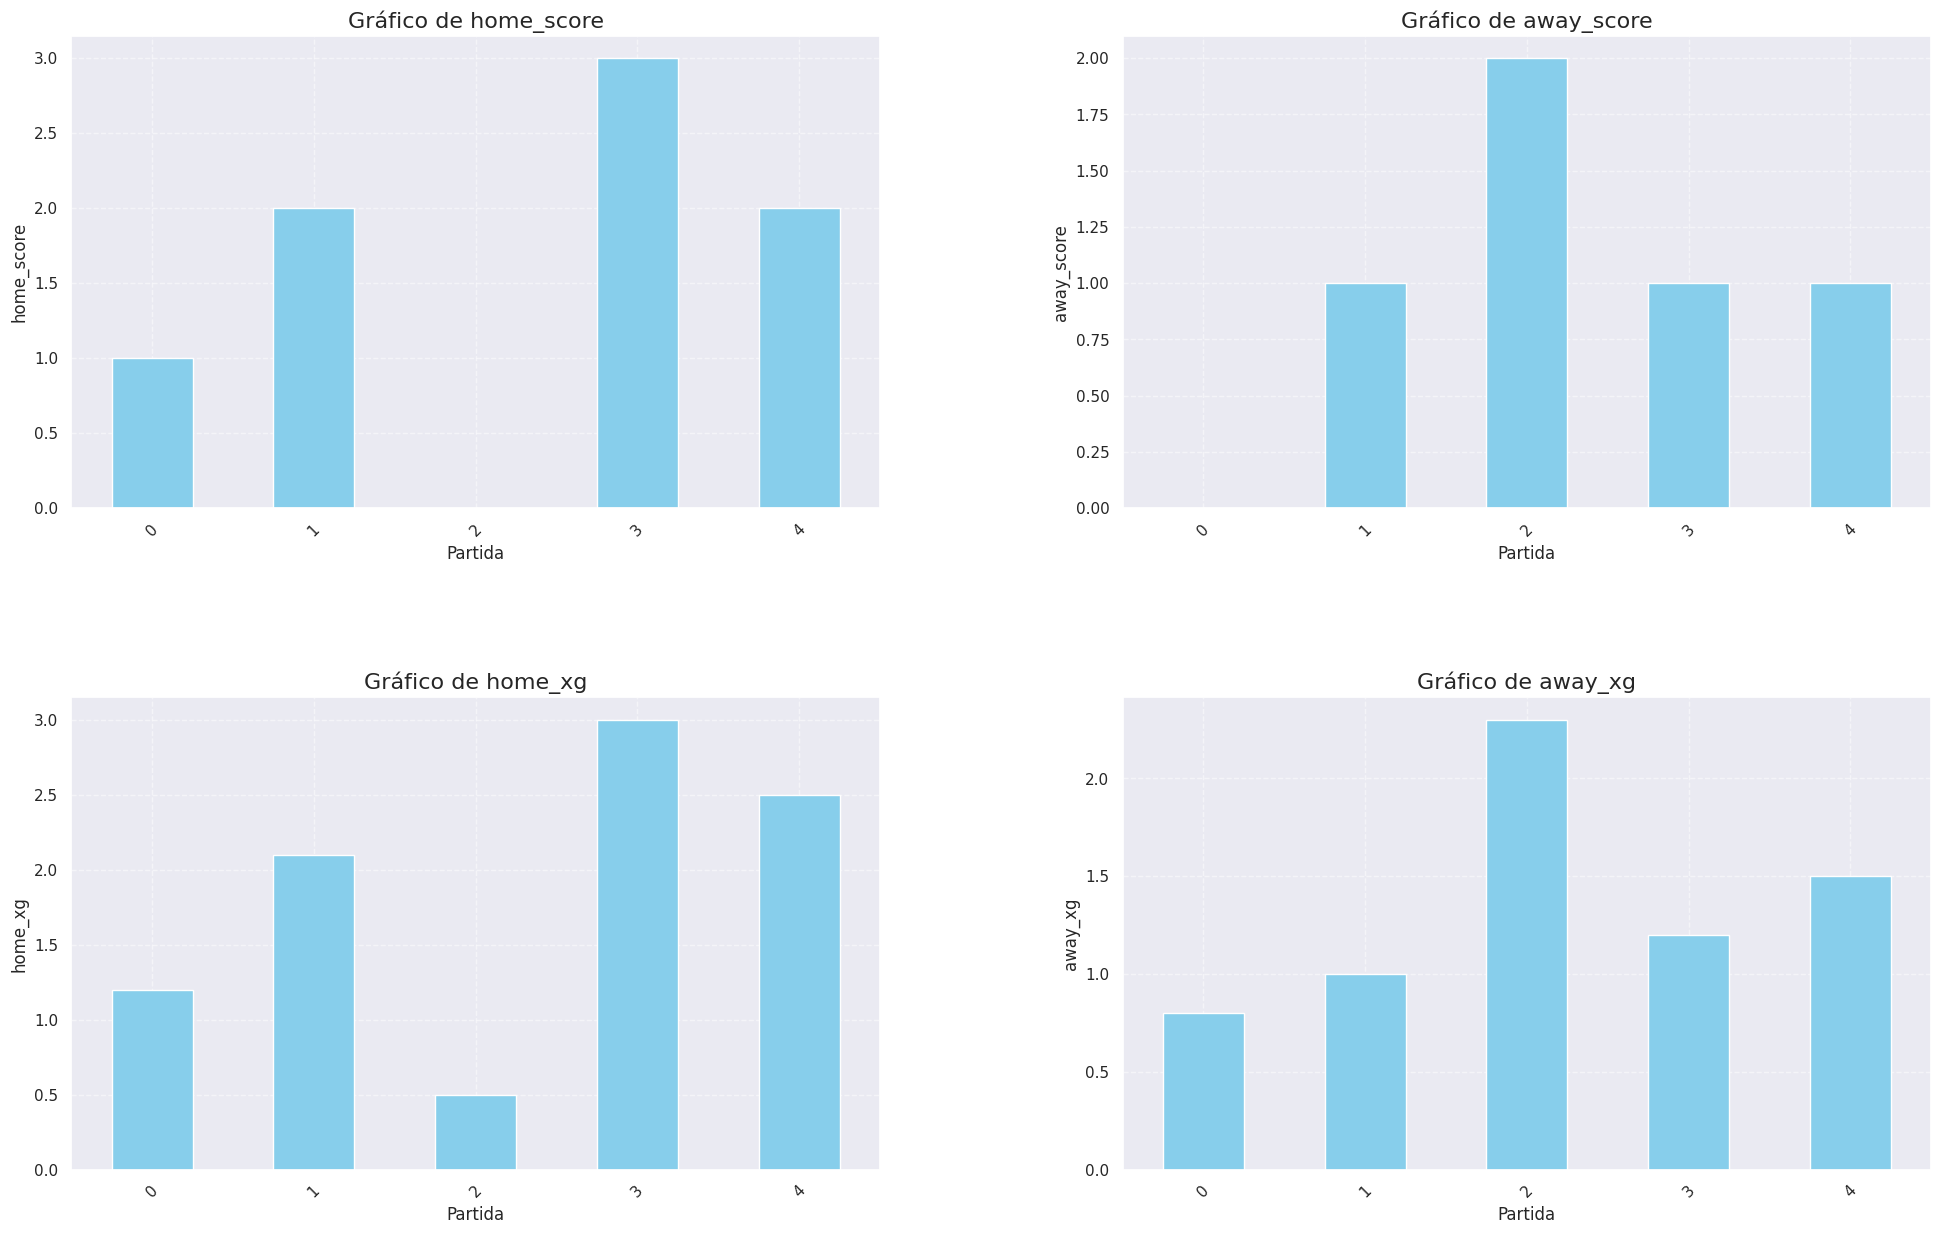

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: carregando seu dataframe (substitua pelo seu arquivo real)
# df = pd.read_csv('wc_formatado.csv')

# Para este exemplo, vou criar um dataframe de teste
df = pd.DataFrame({
    'home_score': [1, 2, 0, 3, 2],
    'away_score': [0, 1, 2, 1, 1],
    'home_xg': [1.2, 2.1, 0.5, 3.0, 2.5],
    'away_xg': [0.8, 1.0, 2.3, 1.2, 1.5]
})

colunas = ['home_score', 'away_score', 'home_xg', 'away_xg']
num_colunas = 2
num_linhas = (len(colunas) + num_colunas - 1) // num_colunas

fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(24, 14))
axes = axes.flatten()

for i, coluna in enumerate(colunas):
    ax = axes[i]
    df[coluna].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Gráfico de {coluna}', fontsize=16)
    ax.set_xlabel('Partida', fontsize=12)
    ax.set_ylabel(coluna, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove eixos extras caso sobre algum subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.92)
plt.show()

